# 多自由度系の固有値解析

吉田勝俊（宇都宮大学）

## 参考情報
- [Pythonで運動方程式を解く(odeint) - Qiita](https://qiita.com/binaryneutronstar/items/ad5efa27fd626826846f)
- [[Python] Numpyの参照、抽出、結合 - Qiita](https://qiita.com/supersaiakujin/items/d63c73bb7b5aac43898a)
- [【Python】行列指数関数・行列対数関数 - Qiita](https://qiita.com/Mrrmm252/items/a50a9b352e5064e40cc1)

In [1]:
%matplotlib inline

import numpy as np                 #数値計算ライブラリ
from scipy.integrate import odeint #常微分方程式ライブラリ
from scipy.linalg import expm      #行列指数関数
import matplotlib.pyplot as plt    #描画ライブラリ
plt_config = {
    'text.usetex': True,
    'text.latex.preamble': r"\usepackage{amsmath}",
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'lines.linewidth': 1.5,
    'lines.markersize': 3,
    'lines.markeredgewidth': 0.7,
    'lines.markerfacecolor': 'white',
    'lines.markeredgecolor': 'black',
}
plt.rcParams.update(plt_config)

## ◯行列指数関数

### ■指数関数

In [2]:
np.exp(2) #普通の指数関数

7.38905609893065

### ■行列指数関数

#### お試し用の行列

In [3]:
A = np.array([
    [0, 1],
    [-3, -2]
])
display(A)

array([[ 0,  1],
       [-3, -2]])

#### （誤）Numpy の `exp` $\neq$ 行列指数関数

In [4]:
np.exp(A) #これは単なる各成分の指数関数値

array([[1.        , 2.71828183],
       [0.04978707, 0.13533528]])

In [5]:
np.exp(A[0,0]), np.exp(A[0,1]), np.exp(A[1,0]), np.exp(A[1,1]) 

(1.0, 2.718281828459045, 0.049787068367863944, 0.1353352832366127)

#### （正）<font color="red">Scipy の `expm` $=$ 行列指数関数</font>．

In [6]:
expm(A)

array([[ 0.31431608,  0.2569476 ],
       [-0.77084281, -0.19957912]])

In [7]:
def Solve_int(eom, param, x0, time):
    '''
    状態方程式の数値解を求める関数
    '''
    ###運動方程式を数値的に解く
    motion = odeint(
        eom,            #運動方程式を表すユーザ関数
        x0,             #初期条件
        time,           #時間軸を表す数列
        args=(param,)  #運動方程式の係数
    )
  
    return motion

def Solve_eAt(A, x0, time):
    '''
    状態方程式の数値解を求める関数
    '''
    motion = np.array([
        expm(t*A).dot(x0) for t in time
    ])
  
    return motion

In [8]:
def EOM_1dof(x, t, param):
    '''
    1自由度・線形自由振動系の運動方程式
    '''
    x1, x2  = x      #状態ベクトルの成分
    m, c, k = param  #パラメータの成分
    dxdt = np.array([
        x2,
        -(k/m)*x1 -(c/m)*x2,
    ])
    
    return dxdt

def A_1dof(param):
    '''
    1自由度・線形自由振動系を表す行列
    '''
    m, c, k = param  #パラメータの成分
    A = np.array([
        [0, 1],
        [-k/m, -c/m],
    ])
    
    return A

In [9]:
def plot_int_vs_eAt(eomfunc, Afunc, param, x0, tminmax=[0,30], tn=200):
    '''
    数値積分と行列指数関数による解を比較プロットする．
    '''
    x0 = np.array(x0)
    ts = np.linspace(*tminmax, tn)
    
    xs_int = Solve_int(eomfunc, param, x0, ts)
    xs_eAt = Solve_eAt(Afunc(param), x0, ts)
    
    fig, ax = plt.subplots(2,1,figsize=(5,4))

    for i in range(2):
        ax[i].plot(ts, xs_int[:,i], '-', 
                label=r'Numerical')
        ax[i].plot(ts, xs_eAt[:,i], 'o', 
                label=r'$e^{tA}\boldsymbol{x}_0$')
        ax[i].legend()
        ax[i].set_xlabel(r'$t$')
        ax[i].set_ylabel(r'$x_%d$'%(i+1))

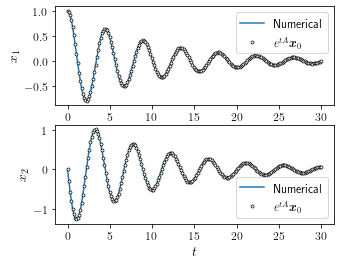

In [10]:
param = [1, 0.2, 2]

plot_int_vs_eAt(EOM_1dof, A_1dof, param, x0=[1,0])

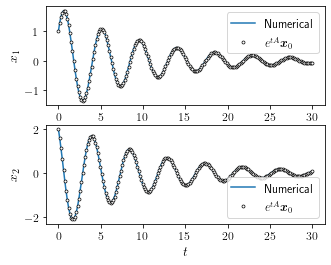

In [11]:
plot_int_vs_eAt(EOM_1dof, A_1dof, param, x0=[1,2])